# House price prediction project

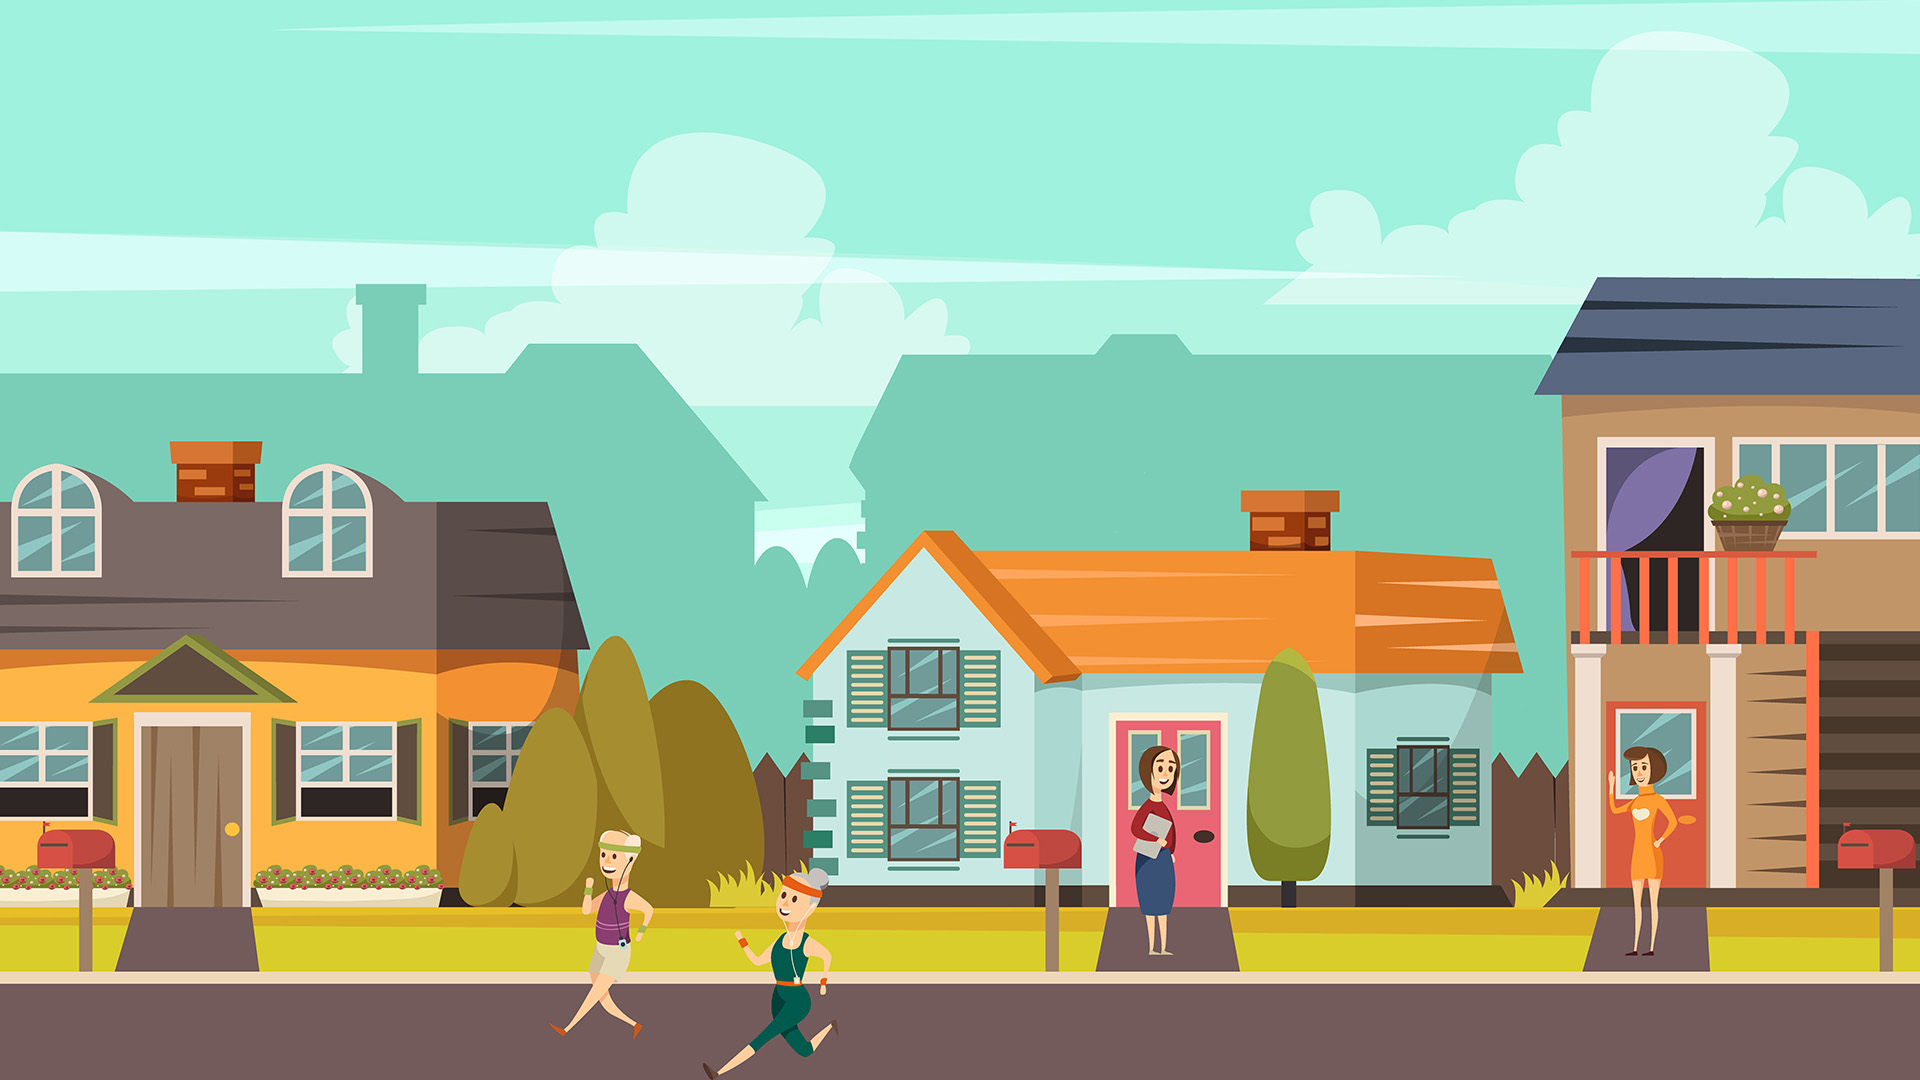

__Problem Statement:__
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


__Business Goal:__
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

__Technical Requirements:__
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

## Importing required libraries

In [5]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [6]:
#lets import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
print('Shape of train dataset:',train.shape)
print('Shape of test dataset:',test.shape)

Shape of train dataset: (1168, 81)
Shape of test dataset: (292, 80)


In [8]:
#lets add source column to train and test dataset
train["source"] = "train"
test["source"] = "test"

In [9]:
#lets combine both the datasets
df = pd.concat([train,test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
3            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1456         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1457         Lvl    AllPub  ...    NaN    NaN        Shed     700      3   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1459         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice  source  
0      2007       WD         Normal   128000.0   train  
1      2007       WD         Normal   268000.0   train  
2      2007       WD         Normal   269790.0   train  
3      2010      COD         Normal   190000.0   train  
4      2009       WD         Normal   215000.0   train  
...     ...      ...            ...        ...     ...  
1455   2008       WD         Normal        NaN    test  
1456   2008       WD         Normal        NaN    test  
1457   2010       WD         Normal        NaN    test  
1458   2006       WD         Normal        NaN    test  
1459   2006       WD         Normal        NaN    test  

[1460 rows x 82 columns]

## Checking for Missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

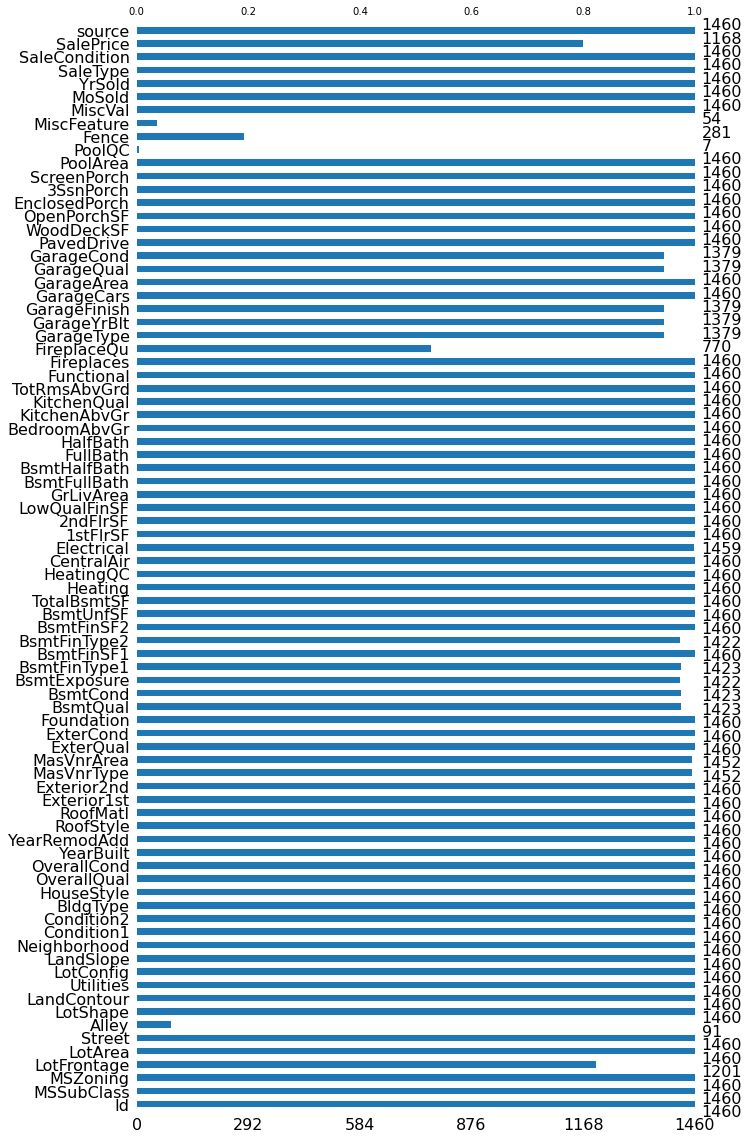

In [14]:
missingno.bar(df, figsize = (10,20), color="tab:blue")

In [12]:
df['Id'].value_counts()

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

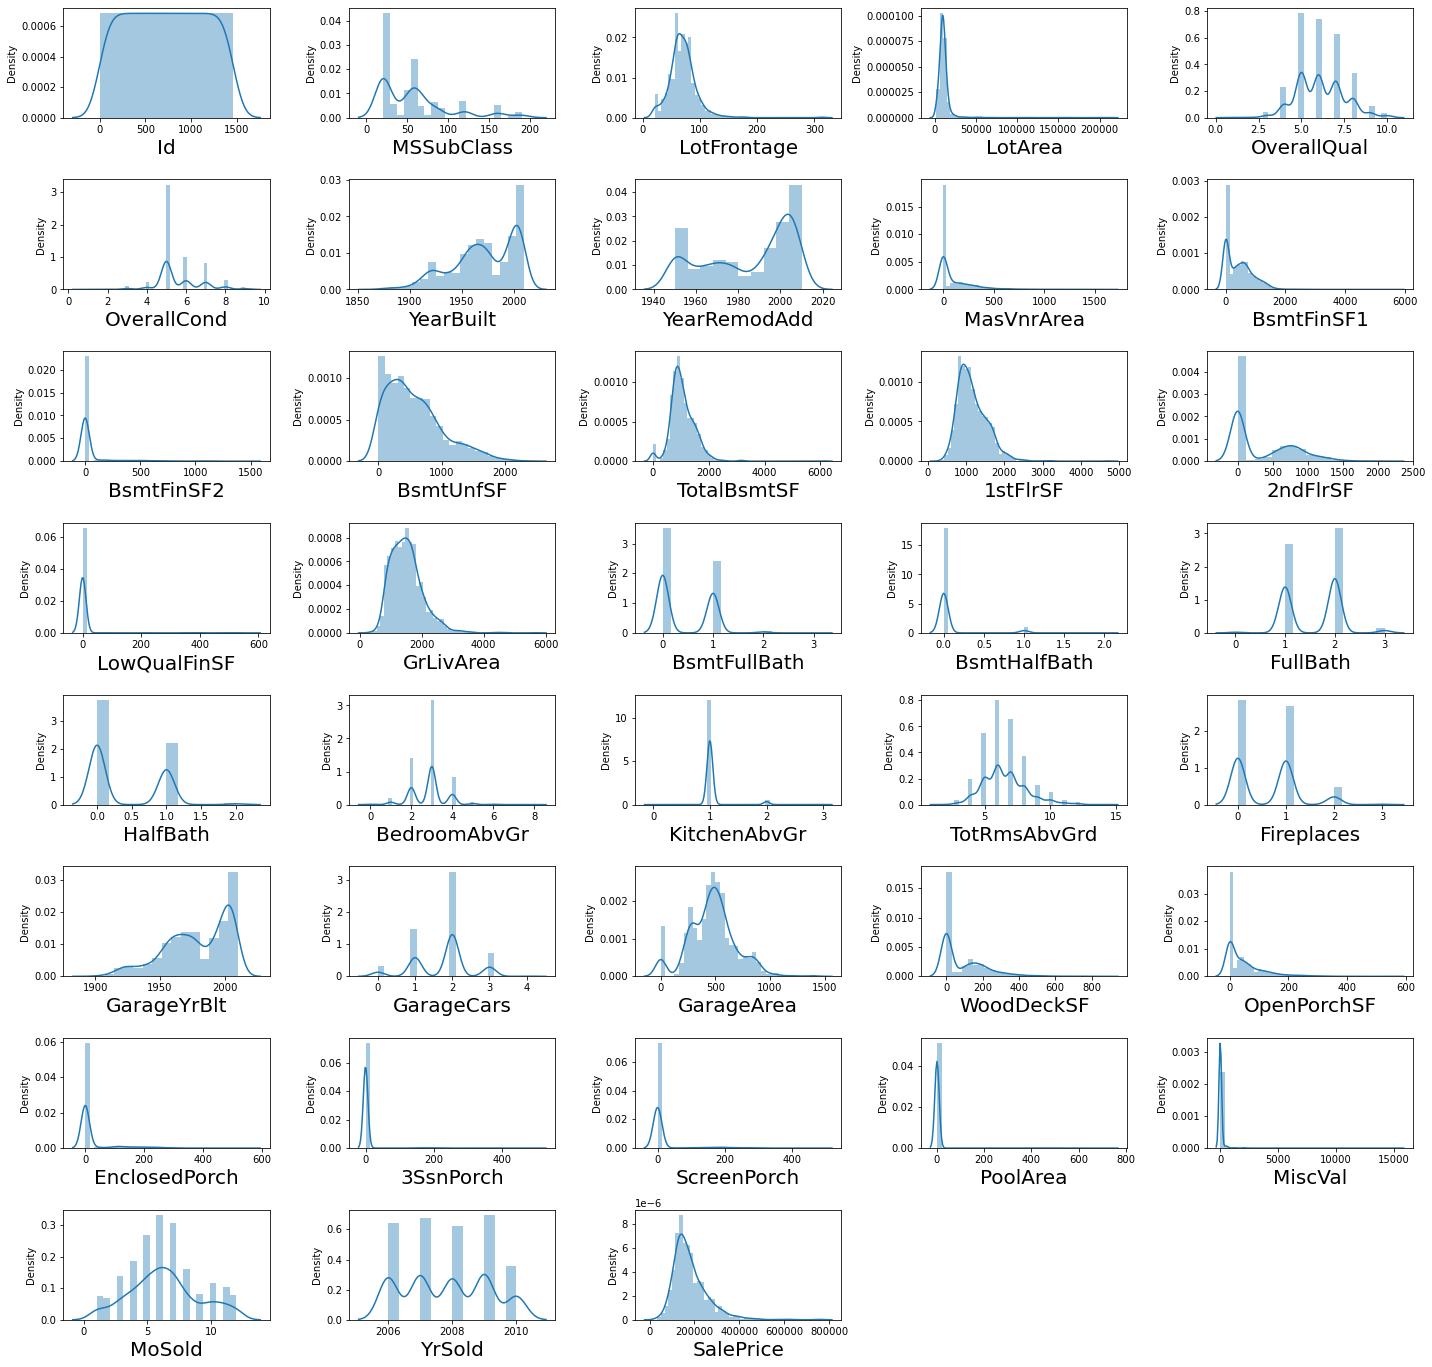

In [13]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [15]:
for col in num_data.columns:
    print(col,df[col].nunique())
    print('-'*20)

Id 1460
--------------------
MSSubClass 15
--------------------
LotFrontage 110
--------------------
LotArea 1073
--------------------
OverallQual 10
--------------------
OverallCond 9
--------------------
YearBuilt 112
--------------------
YearRemodAdd 61
--------------------
MasVnrArea 327
--------------------
BsmtFinSF1 637
--------------------
BsmtFinSF2 144
--------------------
BsmtUnfSF 780
--------------------
TotalBsmtSF 721
--------------------
1stFlrSF 753
--------------------
2ndFlrSF 417
--------------------
LowQualFinSF 24
--------------------
GrLivArea 861
--------------------
BsmtFullBath 4
--------------------
BsmtHalfBath 3
--------------------
FullBath 4
--------------------
HalfBath 3
--------------------
BedroomAbvGr 8
--------------------
KitchenAbvGr 4
--------------------
TotRmsAbvGrd 12
--------------------
Fireplaces 4
--------------------
GarageYrBlt 97
--------------------
GarageCars 5
--------------------
GarageArea 441
--------------------
WoodDeckSF 274
--

I am creating new columns using columns containing the years data such as "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold" to the number of years by substracting these values from current year.

In [16]:
df['Building_age'] = 2021 - df['YearBuilt']
df['years_after_remod'] = 2021 - df['YearRemodAdd']
df['GarageAge'] = 2021 - df['GarageYrBlt']
df['years_after_sold'] = 2021 - df['YrSold']

As we have created separate columns for these columns I will drop earlier columns

In [17]:
df.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace = True)

The column ID contains only ID number which not contributing to our prediction so I will drop this column too.

Columns 'MiscFeature','Fence','PoolQC','Alley' having more than 80% of missing data so I decided to drop these columns.

In [18]:
#dropping unwanted columns
df.drop(columns = ['Id','Fence','PoolQC','MiscFeature','Alley'], inplace = True)

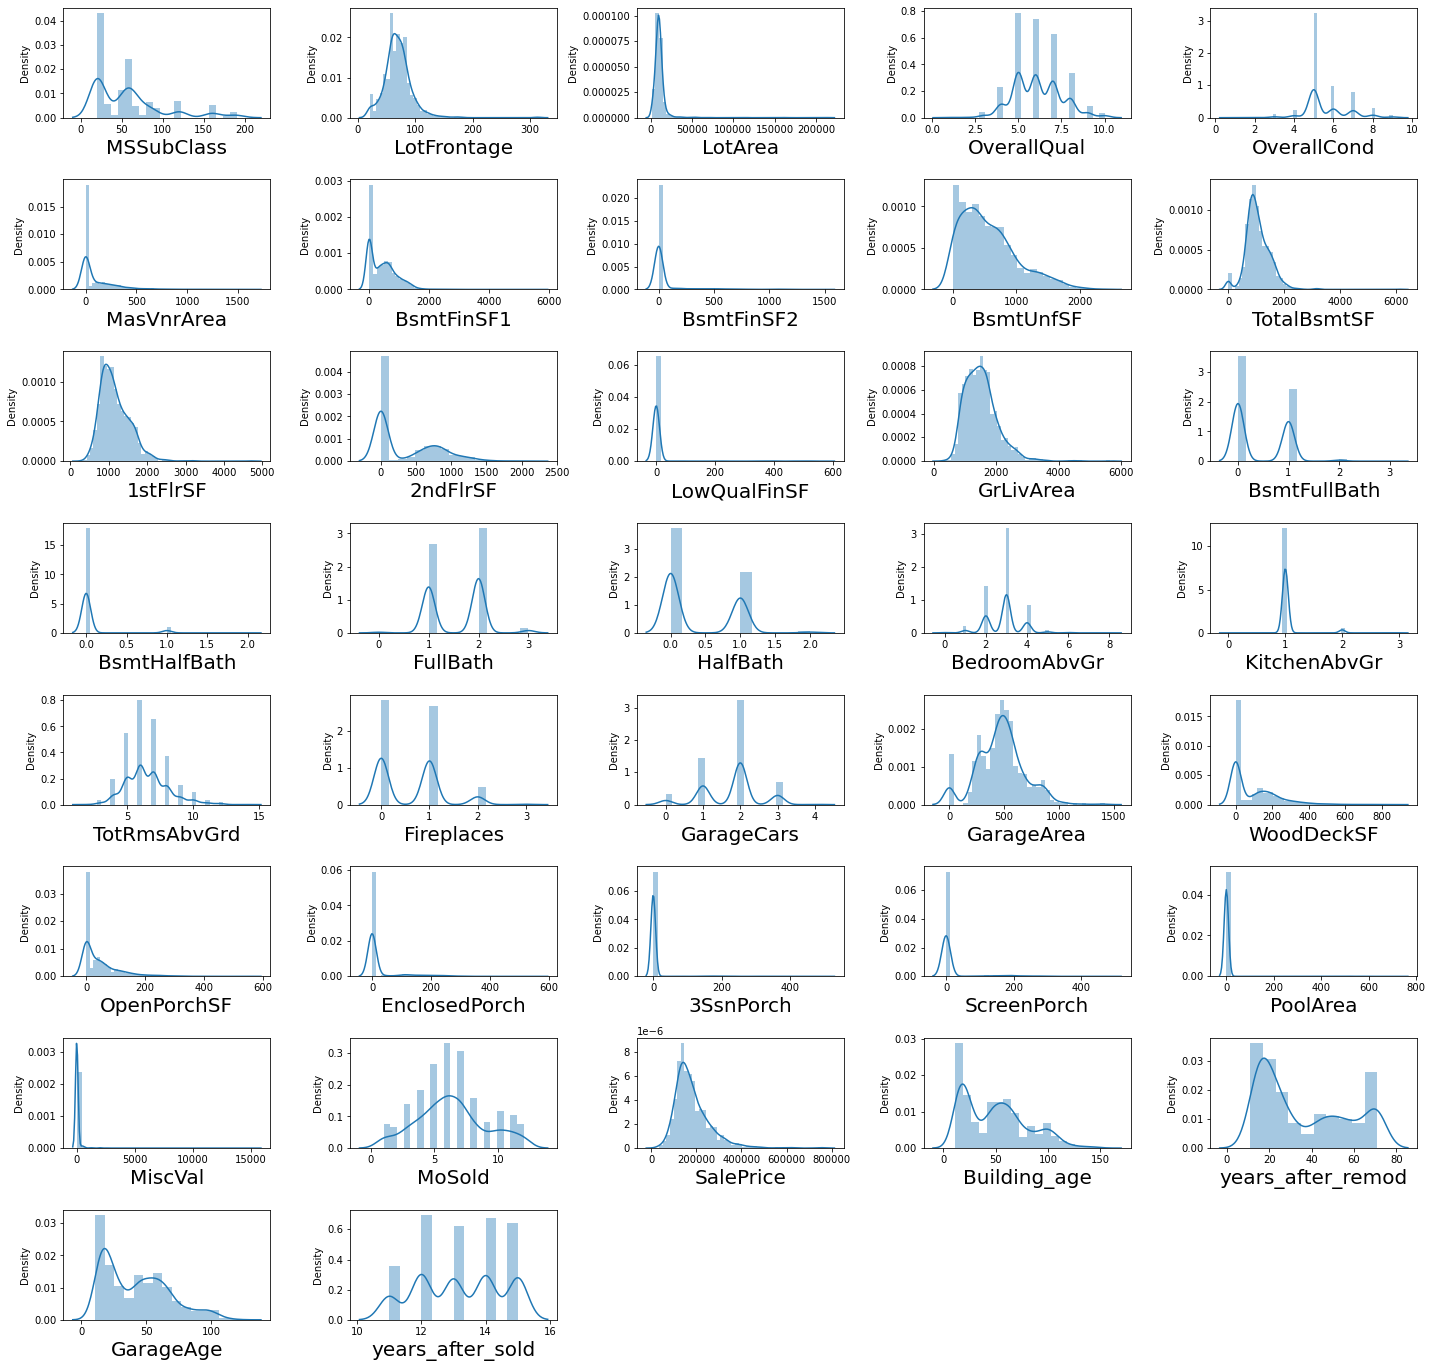

In [19]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Heat Map for checking the correlation

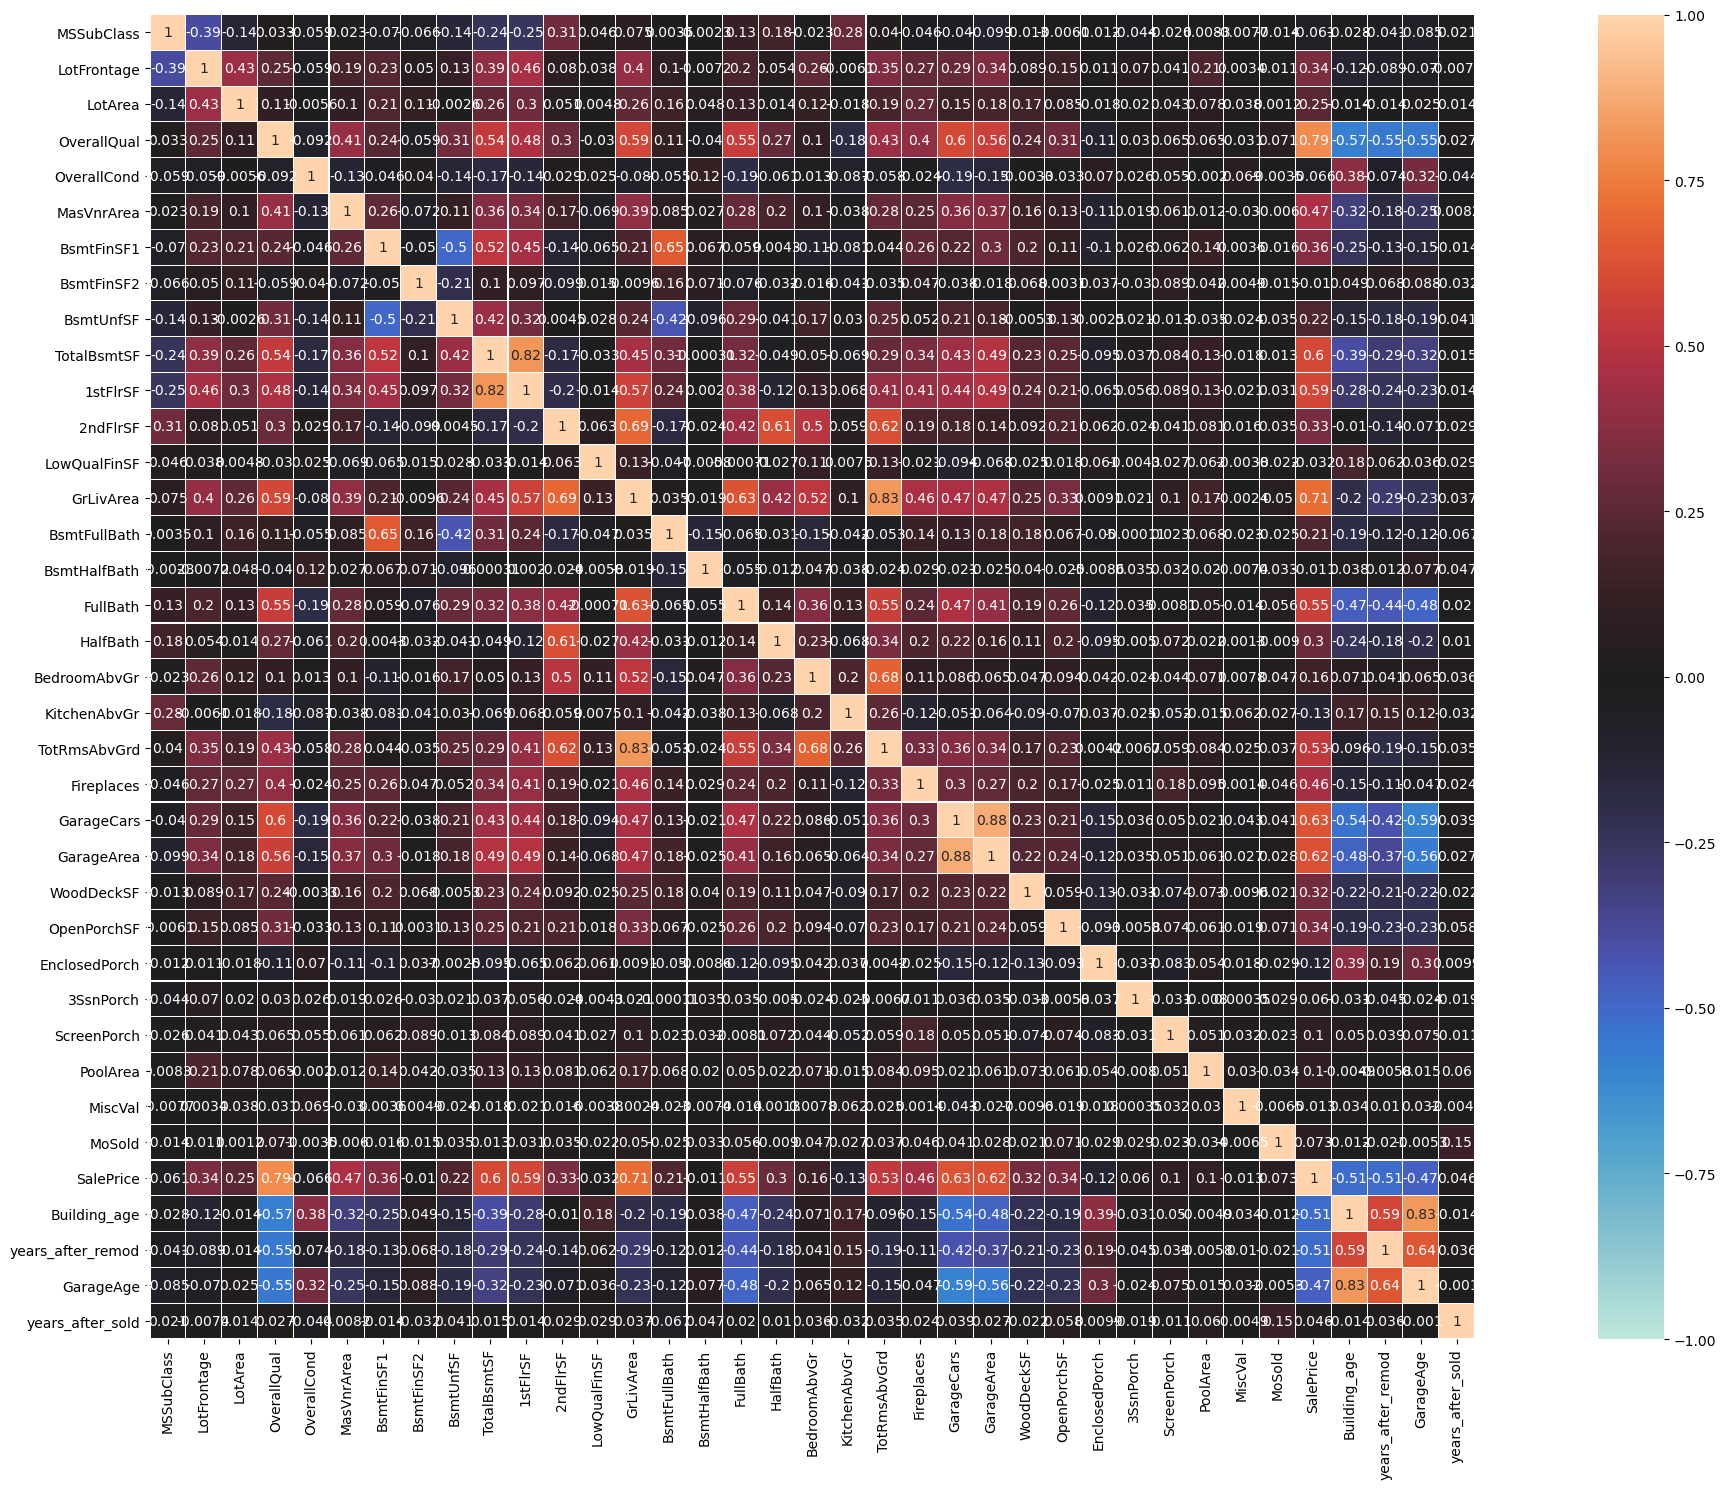

In [20]:
plt.style.use('default')
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()


Looking at the above heat map we can say that many features are in good correlation with our target variable and also many features are having very poor relation with the target variable. The columns derived from year data are having negative relation with Sales Price.

Column "OverallQual" is having highest correlation with target variable

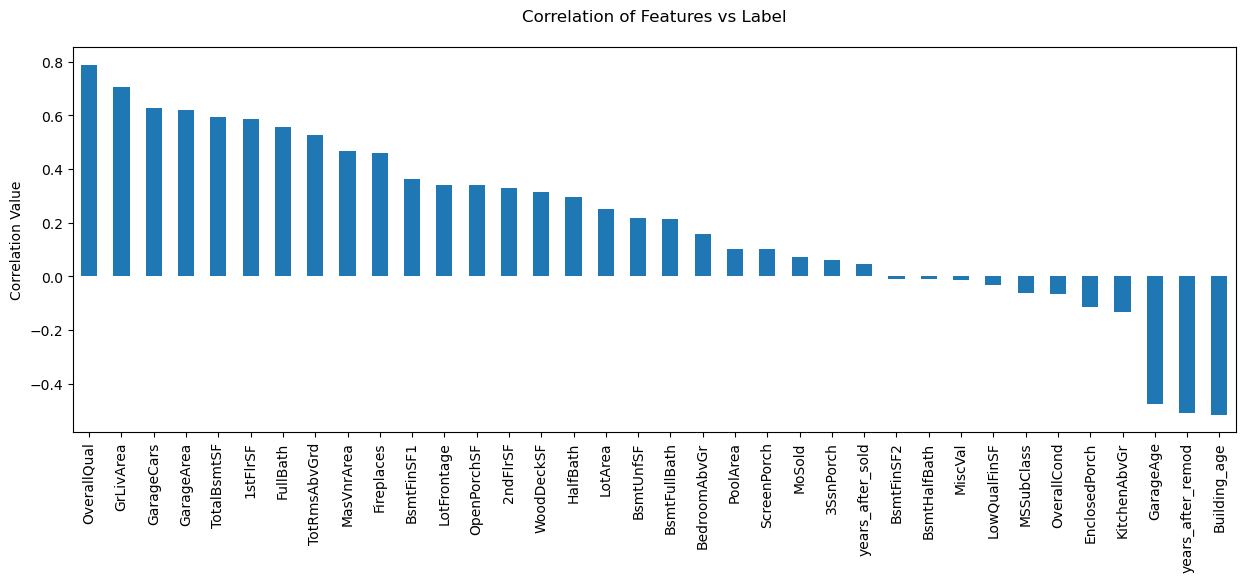

In [21]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['SalePrice'].sort_values( ascending = False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

looking at the above plot we can say that the features like overall quality, grlivArea, GarageCars, garage area are having maximum positive relation with the target variable and features like building age, years_after_remod, GarageAge are in negative relation with the target variable

## EDA

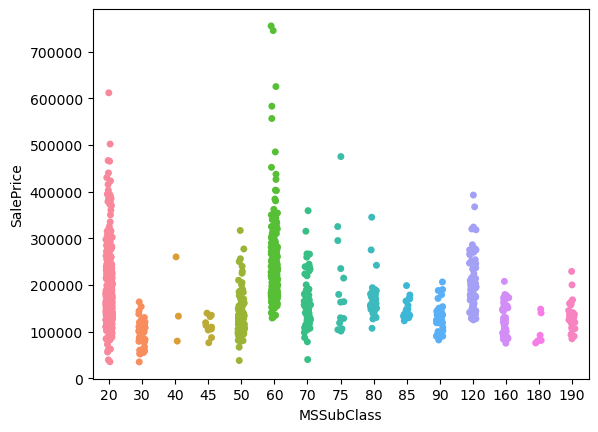

In [22]:
sns.stripplot(x = "MSSubClass", y = 'SalePrice', data = df)
plt.show()

Looking at above strip plot we can say that more number of MSSubClass are 20 and 60 and having higher sale prices also.

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

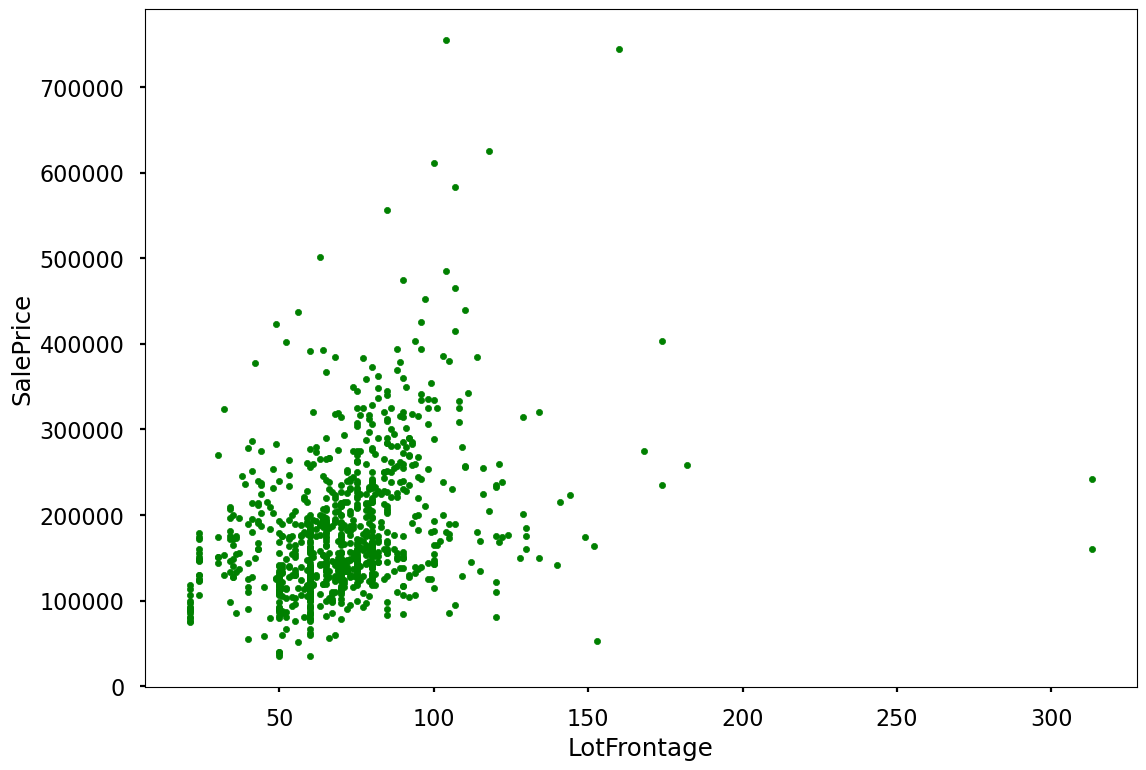

In [23]:
plt.style.use('seaborn-poster')
df.plot(kind='scatter', x='LotFrontage', y='SalePrice', color='g')    


* Above graph is showing the scatterplot LotFrontage vs SalesPrice
* And if the linear feet of street connected to property is more the sales price is higher.


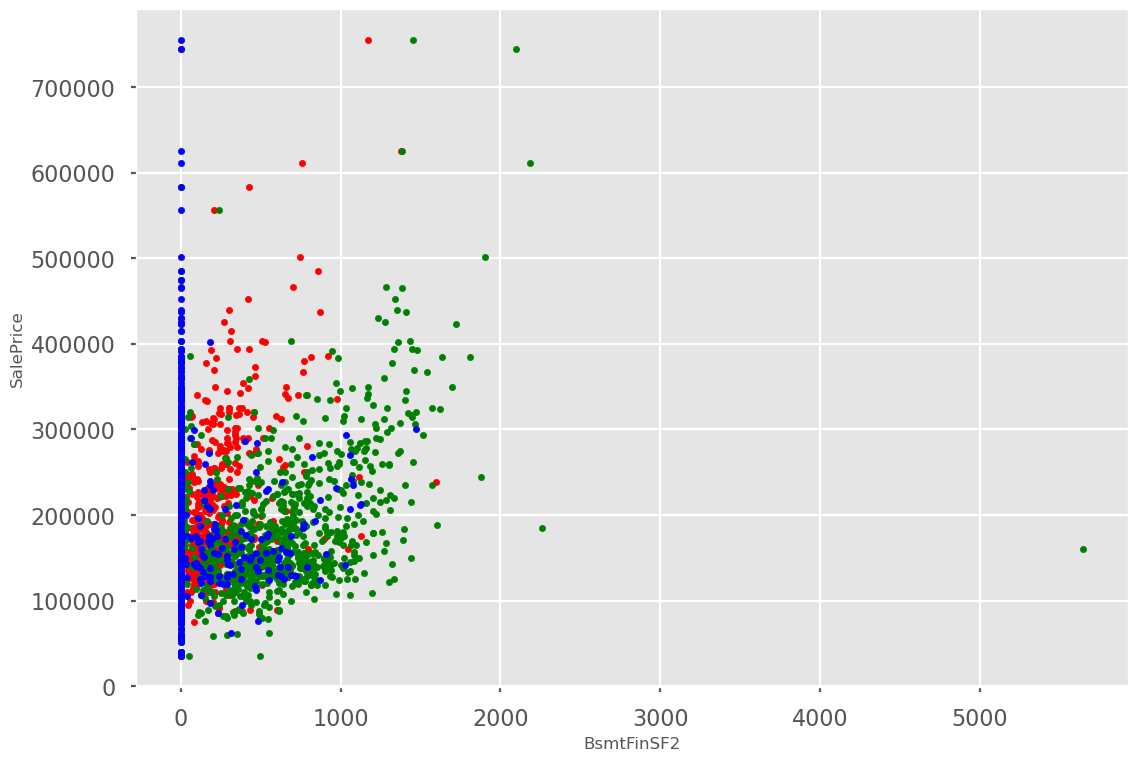

In [24]:
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='MasVnrArea', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', x='BsmtFinSF2', y='SalePrice', color='b', ax=ax1)

The above scatter plot represents the relation for MasVnrArea, BsmtFinSF1, BsmtFinSF2 vs SalePrice.
* This will tell us that as the Masonry veneer area increases the price of the house also get higher.
* And if the house is with more area of type 1 finished the price is higher.
* There are less number of houses with type 2 finish as the area for type two is given zero for most houses.

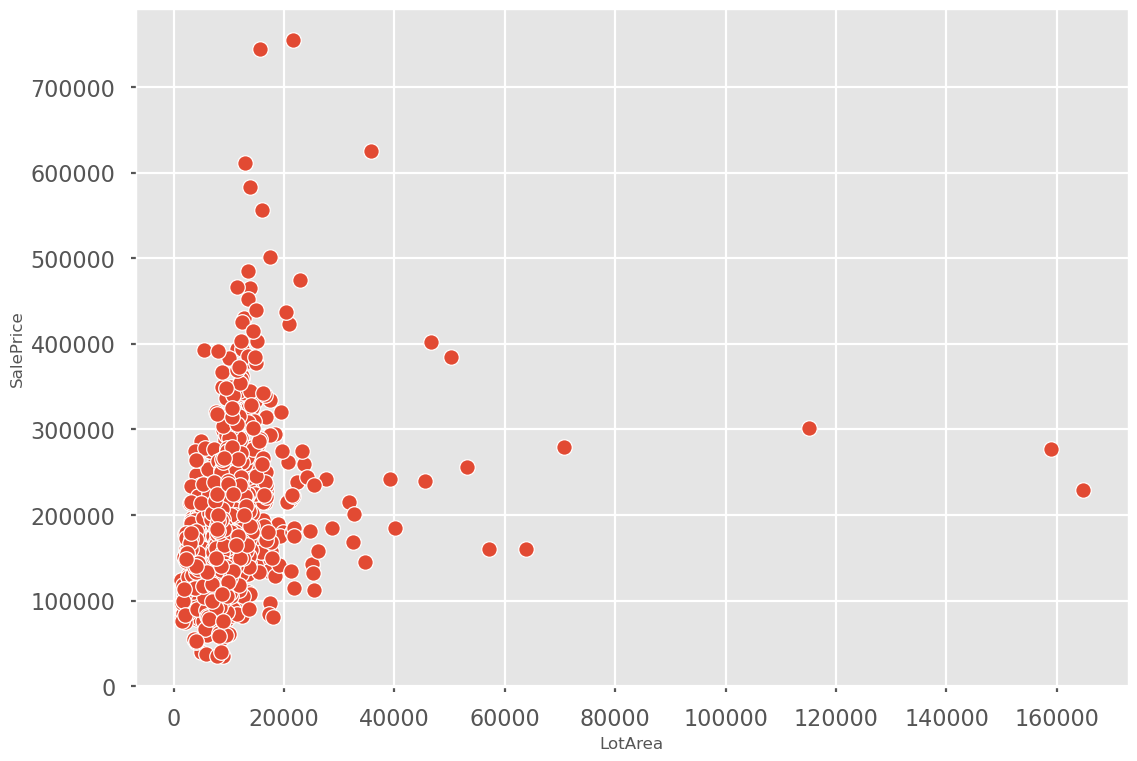

In [25]:
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df)
plt.show()

Above plot is showing the relation between LotArea with sale price, we can clearly see that as the as the lot size get higher the price also will increases. 

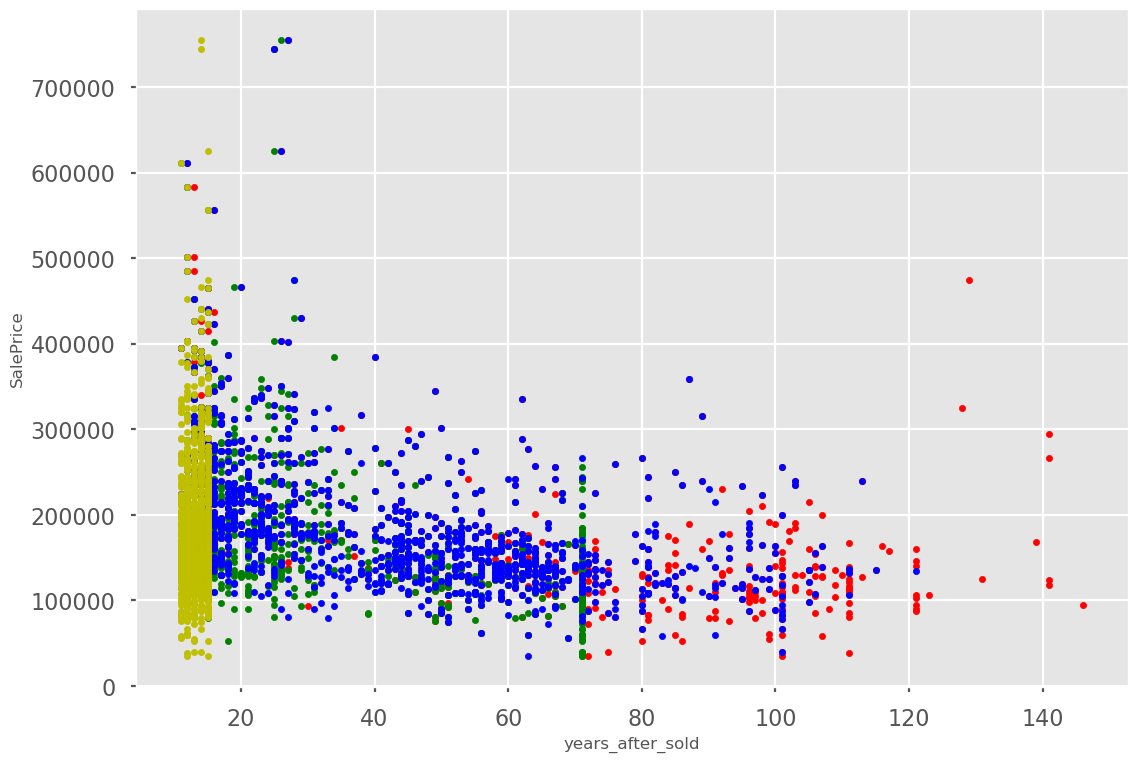

In [27]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='Building_age', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='years_after_remod', y='SalePrice', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', x='GarageAge', y='SalePrice', color='b', ax=ax1)
ax4 = df.plot(kind='scatter', x='years_after_sold', y='SalePrice', color='y', ax=ax1)

* By seeing above plot we can see the buildings which have built long back are having less sales price compare to new buildings.
* Similarly As if Building modification has done long back then the price is less
* And if garages have been built recently the building is having higher sales price
* We can see almost all the buildings have been sold in recent years.

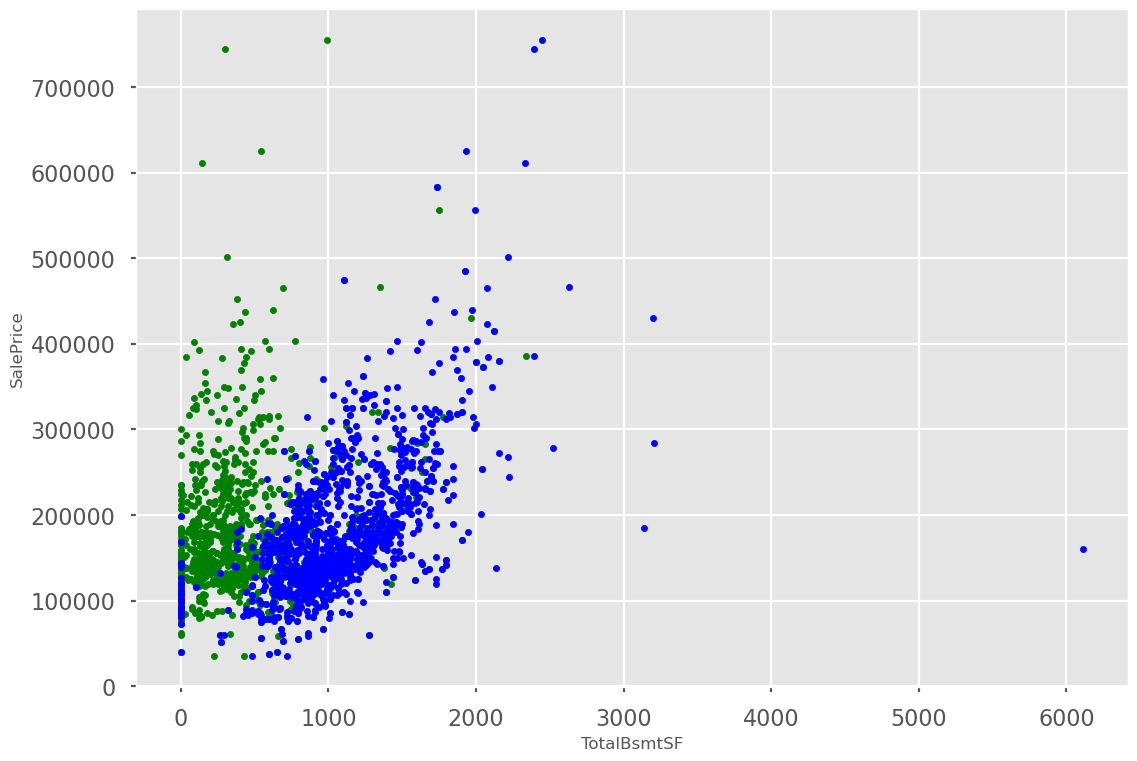

In [29]:
ax1 = df.plot(kind='scatter', x='BsmtUnfSF', y='SalePrice', color='g')
ax2 = df.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', color='b', ax=ax1)

We can see that in most of the cases the Unfinished basement area is below 1000 square feets.


And it will also tell us that the Sales prices will increase as total basement area increases.

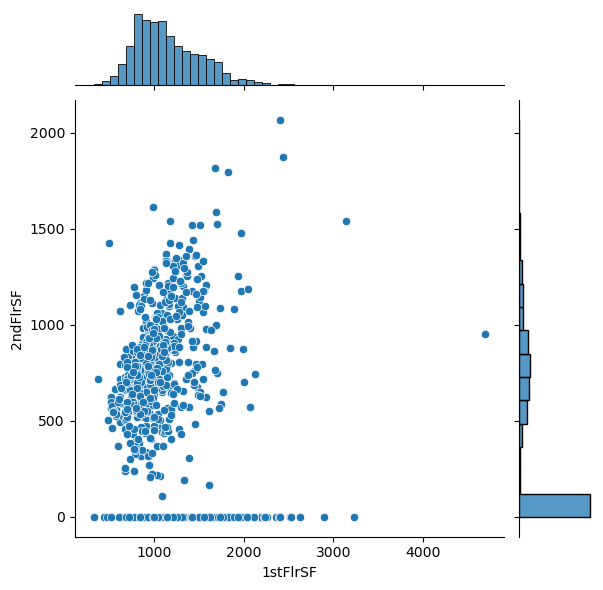

In [30]:
plt.style.use('default')
sns.jointplot(data=df, x="1stFlrSF", y="2ndFlrSF")
plt.show()

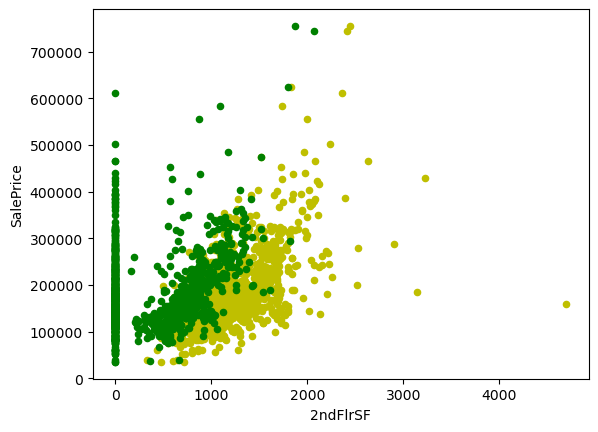

In [33]:
plt.style.use('seaborn-muted')
ax1 = df.plot(kind='scatter', x='1stFlrSF', y='SalePrice', color='y')    
ax2 = df.plot(kind='scatter', x='2ndFlrSF', y='SalePrice', color='g', ax=ax1)

- We can see that most houses are having more area at first floor compare to second floor.
- And some of the houses are not having rooms at second floor.

- And obviously Sales prices increases with the floor area. 

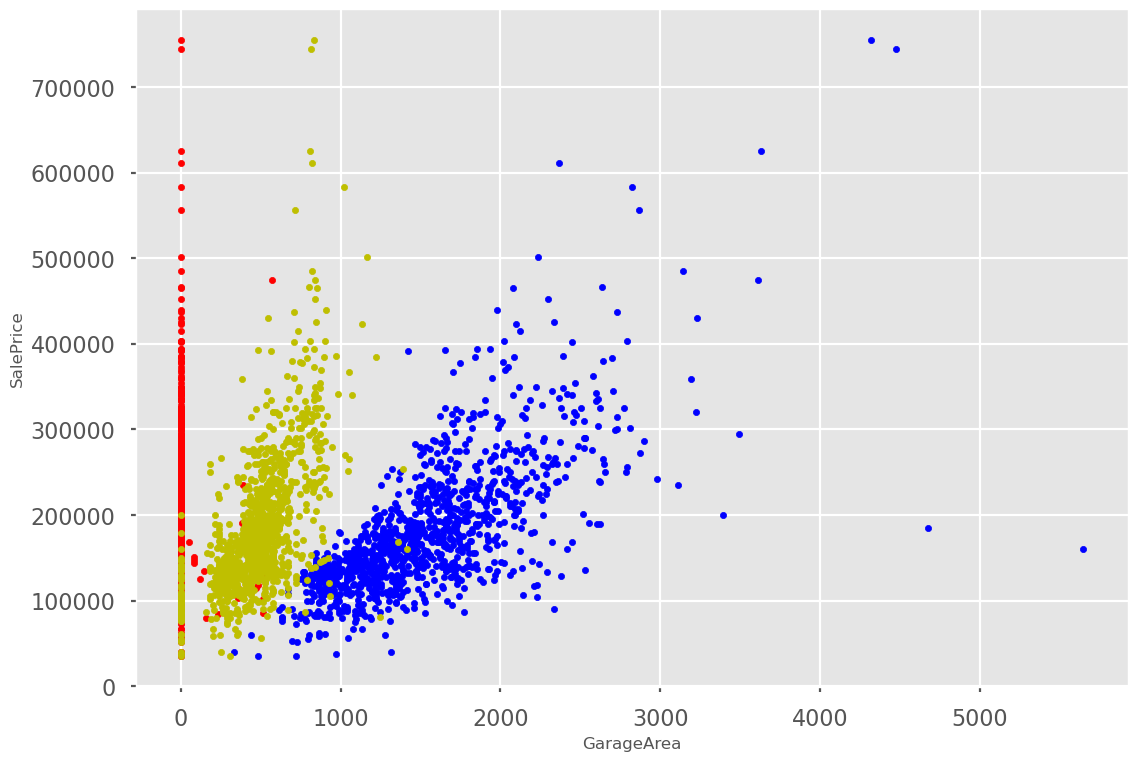

In [34]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='LowQualFinSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='GrLivArea', y='SalePrice', color='b', ax=ax1)
ax2 = df.plot(kind='scatter', x='GarageArea', y='SalePrice', color='y', ax=ax1)

The above figure shows scatter plot for LowQualFinSF, GrLivArea, GarageArea vs SalePrice,

We can see most of the houses are with very less area finished with low quality, and also it is observed that more area finished with low quality causes reduction in sale price.

And as above grade (ground) living area and garage area increases the sale price also increases.

In [35]:
col=['OverallQual','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars','MoSold']

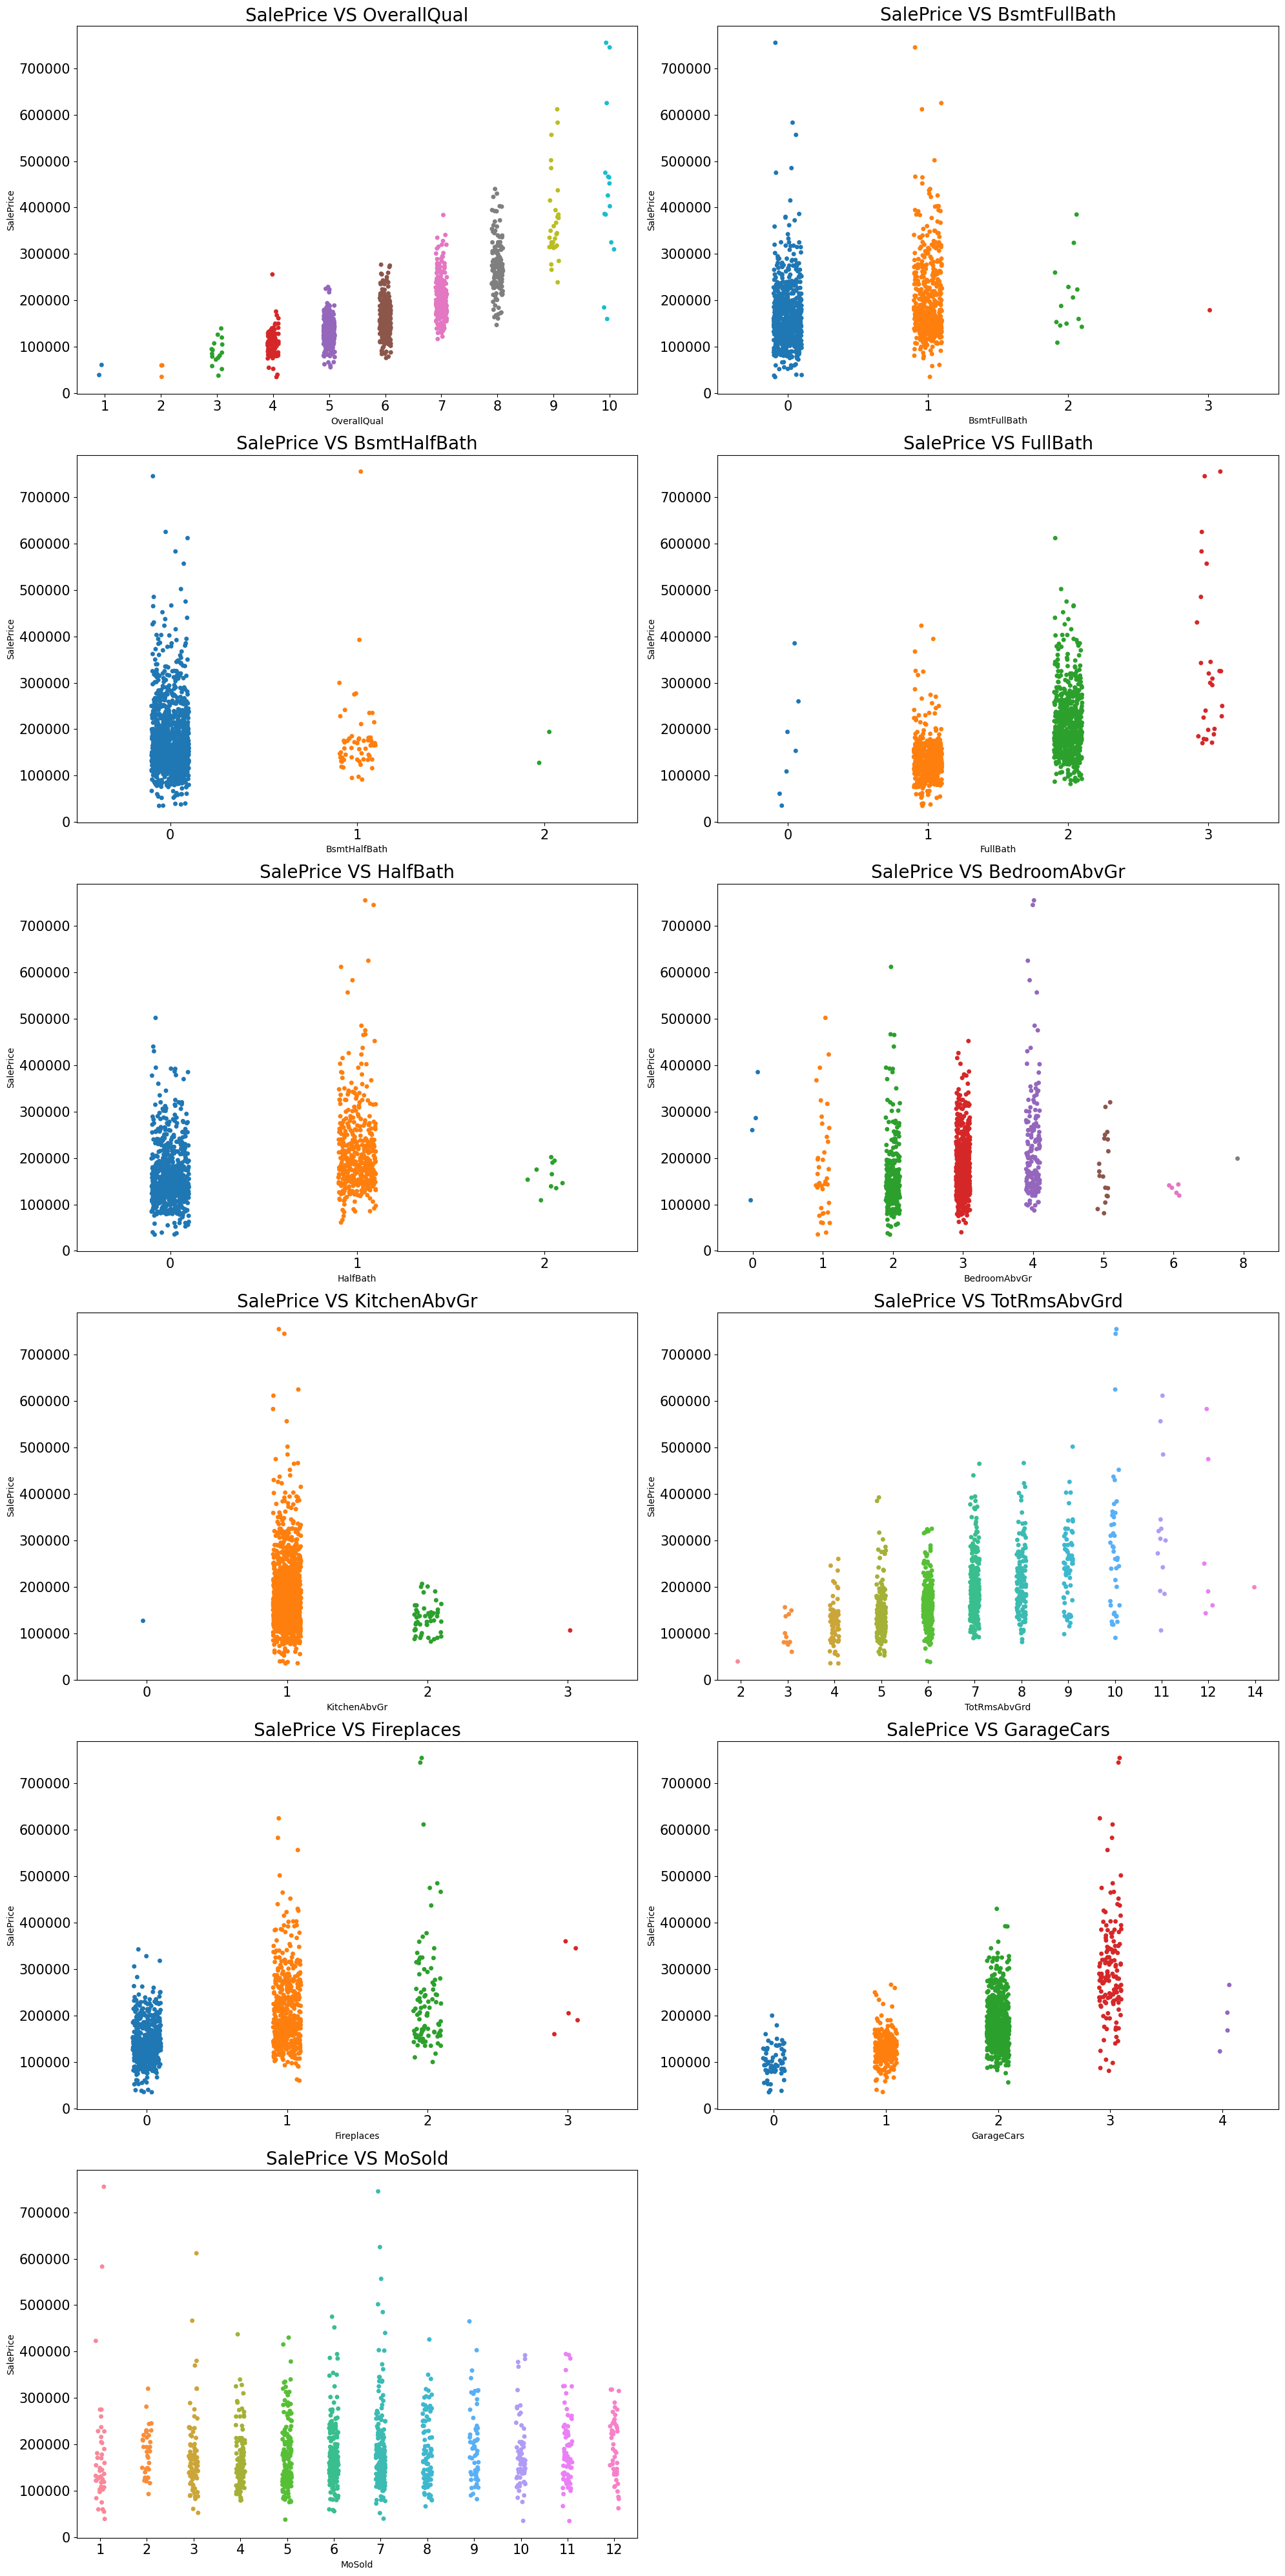

In [36]:
plt.style.use('default')
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

Observations
1. We can see there is good linear relation between OverallQual and SalePrice, that is as quality increases the price of the house also gets higher.
2. Most of the house data shows basement full bathrooms as 0 and 1, and it seems like the number of basement bathrooms is not affecting our sales price.
3. Most of the houses are not having basement half bathrooms.
4. There is some relation is observed between full bathrooms above grade and salePrice. Large count of houses are with 1 - 2 full bathrooms above grade.
5. Many houses are with zero and 1 half-bathrooms, and very few with 2 half_bathrooms.
6. Large number of houses are having 2 to 4 bedrooms and having higher prices. And very few houses are with more than 5 bedrooms which are having lower price.
7. Most of the houses are having single kitchen and some houses with two kitchens. Sale price is higher in case of houses with single kitchen.
8. We can observe some linear relation between Total rooms above grade and Sale Prices as the number of rooms increases the price also goes up.
9. some houses are not having fire places and some are with 1 to 2 fire places, very few houses are haveing 3 fire places.
10. Sales price of house increases with the Size of garage in car capacity. But as the size of garage increases beyond 3 the price comes down.
11. We can see that MoSold column is havng the data from every column and it may not have any significant impact on our target variable.


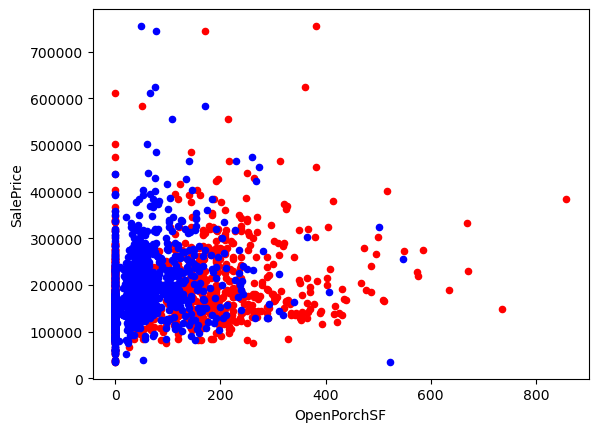

In [37]:
ax1 = df.plot(kind='scatter', x='WoodDeckSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='OpenPorchSF', y='SalePrice', color='b', ax=ax1)

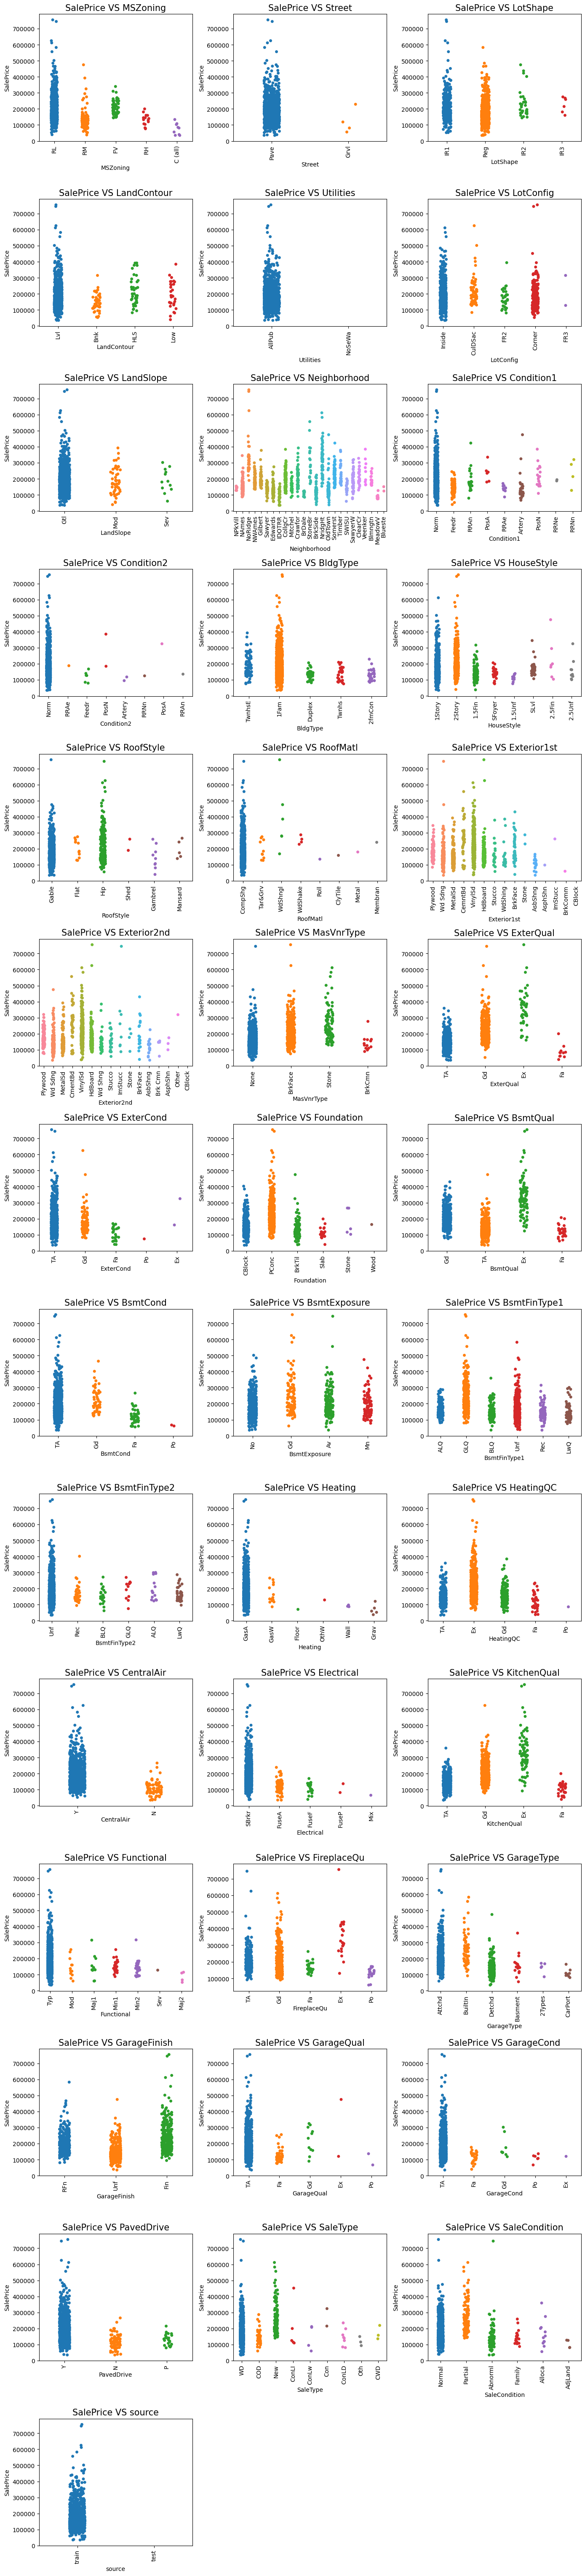

In [38]:
col1 = df.select_dtypes(exclude=[np.number]).columns
plt.style.use('default')
plt.figure(figsize=(14,65))
for i in range(len(col1)):
    plt.subplot(15,3,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col1[i]])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

Observations:


1. Most of the houses are belongs to Residential Low Density zone. and many houses from this zone are having higher prices than other zones.

2. We can observe almost all houses are having paved streets and very few are having gravel streets.

3. Large number of houses are having General shape of property slightly irregular or regular. very few are having irregular shape.

4. looking at the SalePrice vs LandContour plot we can say that most of the houses are nearly Flat/Leveled.

5. Almost all houses are with all kind of utilities.

6. More number of lots are inside or at corners.

7. We can see most of the houses are having gentle slopes, and houses with sever slopes are having slightly lower prices.

8. Houses which are located in Northridge are having more prices compared to other locations.

9. Looking at plot for SalePrice vs Condition1 we can see that most number of houses bearing normal conditions.

10. Looking at the plot for SalePrice vs Condition2 we can see that most houses having normal conditions and very few with other conditions.

11. Most houses are Single-family Detached and are having higher sale prices than other categories.

12. Looking at the plot of SalePrice vs HouseStyle we can see that the houses which are having style of dweling 1-story and 2-story are having higher prices than other types.

13. Many houses are having roof style with gable and hip. and very less number of houses are having shed.

14. many houses are having roof material as standard (Composite) Shingle and houses with roof material as Standard (Composite) Shingle and Wood Shingles are having higher prices.

15. Many houses are having Vinyl Siding as 1st and 2nd covering on the house and are also having higher prices, houses with hard board and cement shilding are also having higher prices.

16. We can observe that the houses are with foure Masonry veneer types that are , Brick Common, Brick Face,Cinder Block, Stone. Houses with Brick Common are having lower price.

17. The prices of houses are higher when material used for exterior are good or excellent.

18. It is observed that the present conditions of exterior material is mostly average/typical and good and prices for the same are higher.

19. Many houses are having cinder block and Poured Contrete foundation and very less houses are having wood foundations, houses with Poured Contrete foundations are having higher prices.

20. Basement quality is mostly average or good and the houses with excelent basement quality are having more prices.

21. Most of the houses are having average/Typical basement conditions and very few houses are with poor basement conditions.

22. It seems like basement exposure is not strongly related to the sale price.

23. Most number of houses are having Heating type as Gas forced warm air furnace and Sale price of houses are higher whenever the quality of heating is excellent.

24. Most houses are having central air conditioning and are having more prices than that of houses which are without air conditioning.

25. Most of the houses with Standard Circuit Breakers & Romex electrical system and are having higher sale prices as well. Very less number of houses are with Mixed type of electrical systems.

26. Most houses are with good and average kitchen quality, houses are having higher prices when  kitchen quality is excellent.

27. Mostly houses are with typical functionality and very less numberof houses are having severely damaged functionality.

28. In vary rare cases fire place are prefabricated fireplace in basement and ben franklin Stove and these houses are having lower prices.

29. In most of the cases garage is attatched to the house only. And when garage is attatched to home or Built-In the house prises are higher and it seems like garage finish does not affect much to sale prices. Mostly garages are with typical/average  quality and conditions.

30. Most of the houses are having paved drive ways 

31. Many houses are having Sale type of Warranty Deed - Conventional and just constructed and sold and are having higher prices.

32. Also many houses are having sale conditions as Normal Sale and Home was not completed when last assessed (associated with New Homes).
	

In [39]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [40]:
#dropping unwanted columns
df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

Above columns are having almost 90% of entries with the value 0, so i decided to drop these columns.

In [41]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print('='*30)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

Looking at the counts of categorical columns I came to know that the columns Utilities and Heating are having more than 90% of same entries so I am dropping these columns.

In [42]:
df.drop(columns = ['Utilities','Heating'], inplace = True)

In [43]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage        1201.0      70.049958     24.284752     21.0      59.00   
LotArea            1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual        1460.0       6.099315      1.382997      1.0       5.00   
OverallCond        1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea         1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2         1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea          1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath       1460.0       0.057534      0.238753      0.0       0.00   
FullBath           1460.0       1.565068      0.550916      0.0       1.00   
HalfBath           1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.00   
GarageCars         1460.0       1.767123      0.747315      0.0       1.00   
GarageArea         1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.00   
MoSold             1460.0       6.321918      2.703626      1.0       5.00   
SalePrice          1168.0  181477.005993  79105.586863  34900.0  130375.00   
Building_age       1460.0      49.732192     30.202904     11.0      21.00   
years_after_remod  1460.0      36.134247     20.645407     11.0      17.00   
GarageAge          1379.0      42.493836     24.689725     11.0      19.00   
years_after_sold   1460.0      13.184247      1.328095     11.0      12.00   

                        50%        75%       max  
MSSubClass             50.0      70.00     190.0  
LotFrontage            69.0      80.00     313.0  
LotArea              9478.5   11601.50  215245.0  
OverallQual             6.0       7.00      10.0  
OverallCond             5.0       6.00       9.0  
MasVnrArea              0.0     166.00    1600.0  
BsmtFinSF1            383.5     712.25    5644.0  
BsmtFinSF2              0.0       0.00    1474.0  
BsmtUnfSF             477.5     808.00    2336.0  
TotalBsmtSF           991.5    1298.25    6110.0  
1stFlrSF             1087.0    1391.25    4692.0  
2ndFlrSF                0.0     728.00    2065.0  
GrLivArea            1464.0    1776.75    5642.0  
BsmtFullBath            0.0       1.00       3.0  
BsmtHalfBath            0.0       0.00       2.0  
FullBath                2.0       2.00       3.0  
HalfBath                0.0       1.00       2.0  
BedroomAbvGr            3.0       3.00       8.0  
KitchenAbvGr            1.0       1.00       3.0  
TotRmsAbvGrd            6.0       7.00      14.0  
Fireplaces              1.0       1.00       3.0  
GarageCars              2.0       2.00       4.0  
GarageArea            480.0     576.00    1418.0  
WoodDeckSF              0.0     168.00     857.0  
OpenPorchSF            25.0      68.00     547.0  
MoSold                  6.0       8.00      12.0  
SalePrice          163995.0  215000.00  755000.0  
Building_age           48.0      67.00     149.0  
years_after_remod      27.0      54.00      

## Filling missing values

Our data is with large number of missing values and there are many ways to treat missing values.

I have dropped the columns which are having more than 80% of missing values

Missing values from some categorical columns which are having large number of null values have been replaced by ‘None’. Missing values from numerical columns which are having large number of null values are replaced with ‘0’.

And for columns are having less missing values I have replaced categorical data with mode and numerical data with the mean of that particular column.


In [44]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']:
    df[col] = df[col].fillna('None')
for col in ['GarageAge','MasVnrArea']:
      df[col] = df[col].fillna(0)    

Some of the categorical columns are having the ratings based on specific condition, I will replace that with numbers

In [45]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

## Outliers

As we obserdved from scatterplots and data description many columns are having outliers and if I removed these outliers using z-score/IQR method I will lose lot of the data, so I am replacing those outliers by percentile method.


In [46]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for col in df.columns:
    if df[col].dtypes != 'object':
      percentile = df[col].quantile([0.01,0.98]).values
      df[col][df[col]<=percentile[0]]=percentile[0]
      df[col][df[col]>=percentile[1]]=percentile[1]

## Devide train and test datasets

In [47]:
#Divide into test and train:
df_train = df.loc[df['source']== 'train']
df_test = df.loc[df['source']== 'test']
test.reset_index(drop=True,inplace=True)

In [48]:
df_train.drop(columns = 'source', inplace = True)
df_test.drop(columns = 'source', inplace = True)

In [49]:
#lets saperate data into label and features
x = df_train.drop(columns = 'SalePrice')
y = df_train["SalePrice"]

In [50]:
x.skew()

MSSubClass           1.409001
LotFrontage          0.069815
LotArea              1.205411
OverallQual          0.139627
OverallCond          0.565815
MasVnrArea           1.858884
ExterQual            0.965940
ExterCond            1.227778
BsmtQual            -1.310393
BsmtCond            -3.568301
BsmtFinSF1           0.638761
BsmtFinSF2           3.527845
BsmtUnfSF            0.770865
TotalBsmtSF          0.150128
HeatingQC           -0.495647
1stFlrSF             0.631423
2ndFlrSF             0.716110
GrLivArea            0.617880
BsmtFullBath         0.355224
BsmtHalfBath         3.954345
FullBath             0.166941
HalfBath             0.494488
BedroomAbvGr        -0.326248
KitchenAbvGr         4.374289
KitchenQual          0.368347
TotRmsAbvGrd         0.501357
Fireplaces           0.552677
FireplaceQu          0.082978
GarageCars          -0.434745
GarageArea          -0.131175
GarageQual          -3.532481
GarageCond          -3.530060
WoodDeckSF           1.065427
OpenPorchS

In [51]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [52]:
x.skew()

MSSubClass           0.232724
LotFrontage          0.069815
LotArea             -0.720663
OverallQual          0.139627
OverallCond          0.007022
MasVnrArea           0.510251
ExterQual            0.822429
ExterCond            0.458843
BsmtQual            -1.310393
BsmtCond            -3.568301
BsmtFinSF1          -0.387019
BsmtFinSF2           2.486009
BsmtUnfSF           -1.089227
TotalBsmtSF          0.150128
HeatingQC           -0.495647
1stFlrSF            -0.017926
2ndFlrSF             0.288398
GrLivArea           -0.060929
BsmtFullBath         0.355224
BsmtHalfBath         3.954345
FullBath             0.166941
HalfBath             0.494488
BedroomAbvGr        -0.326248
KitchenAbvGr         4.374289
KitchenQual          0.368347
TotRmsAbvGrd        -0.100027
Fireplaces           0.158186
FireplaceQu          0.082978
GarageCars          -0.434745
GarageArea          -0.131175
GarageQual          -3.532481
GarageCond          -3.530060
WoodDeckSF           0.126580
OpenPorchS

In [53]:
num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [54]:
cat_data

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0          RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1          RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2          RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3          RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4          RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   
...       ...    ...      ...         ...       ...       ...          ...   
1163       RL   Pave      IR1         Lvl    Inside       Gtl       Sawyer   
1164       RL   Pave      Reg         Lvl    Inside       Gtl      Edwards   
1165       RL   Pave      Reg         Lvl       FR2       Gtl      NPkVill   
1166  C (all)   Pave      Reg         Lvl    Inside       Gtl       IDOTRR   
1167       RL   Pave      IR1         Lvl    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType  ... BsmtFinType1 BsmtFinType2 CentralAir  \
0          Norm       Norm   TwnhsE  ...          ALQ          Unf          Y   
1          Norm       Norm     1Fam  ...          ALQ          Rec          Y   
2          Norm       Norm     1Fam  ...          GLQ          Unf          Y   
3          Norm       Norm     1Fam  ...          BLQ          Unf          Y   
4          Norm       Norm     1Fam  ...          ALQ          Unf          Y   
...         ...        ...      ...  ...          ...          ...        ...   
1163       Norm       Norm     1Fam  ...          BLQ          Unf          Y   
1164      Feedr       Norm     1Fam  ...         None         None          Y   
1165       Norm       Norm    Twnhs  ...          ALQ          Unf          Y   
1166      Feedr       Norm     1Fam  ...          Unf          Unf          N   
1167       Norm       Norm     1Fam  ...          GLQ          Unf          Y   

     Electrical Functional GarageType GarageFinish PavedDrive SaleType  \
0         SBrkr        Typ     Attchd          RFn          Y       WD   
1         SBrkr        Typ     Attchd          Unf          Y       WD   
2         SBrkr        Typ     Attchd          Unf          Y       WD   
3         SBrkr        Typ     Attchd          RFn          Y      COD   
4         SBrkr        Typ     Attchd          Fin          Y       WD   
...         ...        ...        ...          ...        ...      ...   
1163      SBrkr        Typ     Detchd          Unf          Y       WD   
1164      SBrkr        Typ     Detchd          Fin          N       WD   
1165      SBrkr        Typ     Attchd          Unf          Y       WD   
1166      SBrkr        Typ     Detchd          Unf          N       WD   
1167      SBrkr        Typ     Attchd          Fin          Y       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  
...            ...  
1163        Normal  
1164        Normal  
1165        Normal  
1166        Normal  
1167        Normal  

[1168 rows x 28 columns]

### Applying standard scaler to numerical data

In [55]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

### Encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [57]:
num

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0       1.426932    -2.006131 -1.309687    -0.072810    -0.501684   -0.802123   
1      -1.131696     1.265407  1.253518     1.419154     0.457894   -0.802123   
2       0.426259     1.108910  0.184431     0.673172    -0.501684   -0.802123   
3      -1.131696     1.787065  0.563945    -0.072810     0.457894    1.566151   
4      -1.131696     0.550157  1.364379    -0.072810     1.289119    1.055488   
...          ...          ...       ...          ...          ...         ...   
1163   -1.131696     0.192749  0.161724    -0.818792    -0.501684    0.526891   
1164   -1.131696    -0.195234 -0.085540    -1.564774    -0.501684   -0.802123   
1165    1.844218    -2.438361 -2.818820    -0.072810     0.457894   -0.802123   
1166    0.648050    -1.082052 -0.155663    -1.564774    -1.636625   -0.802123   
1167    0.426259     0.476533 -0.325515    -0.072810    -0.501684   -0.802123   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  GarageArea  GarageQual  \
0     -0.747738  -0.196101  0.586914  0.117460  ...   -0.164072    0.286577   
1      1.090393   2.524450 -0.553711  1.899193  ...    0.716342    0.286577   
2      1.090393  -0.196101  0.586914  0.117460  ...   -0.091110    0.286577   
3     -0.747738  -0.196101  0.586914  0.117460  ...    0.351529    0.286577   
4      1.090393  -0.196101  0.586914  0.117460  ...    0.268839    0.286577   
...         ...        ...       ...       ...  ...         ...         ...   
1163  -0.747738   2.524450 -0.553711  0.117460  ...   -0.942339    0.286577   
1164  -0.747738  -0.196101 -3.975588 -5.227737  ...    0.225061    0.286577   
1165  -0.747738  -0.196101  0.586914  0.117460  ...   -0.164072    0.286577   
1166  -0.747738  -3.703500 -0.553711  0.117460  ...   -1.088264    0.286577   
1167   1.090393  -0.196101  0.586914  0.117460  ...   -0.392688    0.286577   

      GarageCond  WoodDeckSF  OpenPorchSF    MoSold  Building_age  \
0       0.281408   -0.957307     1.415031 -1.617822     -0.162969   
1       0.281408    0.739471     1.419525  1.361470      0.040585   
2       0.281408    1.044340     1.204466 -0.128176     -0.841482   
3       0.281408   -0.957307     1.175155 -1.990233     -0.196894   
4       0.281408    1.154578    -1.063249 -0.128176     -0.196894   
...          ...         ...          ...       ...           ...   
1163    0.281408   -0.957307    -1.063249 -1.617822      0.142362   
1164    0.281408   -0.957307     1.064693 -0.500587      0.753024   
1165    0.281408    0.766662    -1.063249  0.244236     -0.162969   
1166   -1.135334   -0.957307     0.800776  0.244236      1.736868   
1167    0.281408    0.819715     0.951206 -0.128176     -1.045036   

      years_after_remod  GarageAge  years_after_sold  
0              0.421463   0.358529          0.605487  
1              0.710324   0.574679          0.605487  
2             -0.589553  -0.437262          0.605487  
3              0.373319   0.358529         -1.651563  
4             -0.733984   0.358529         -0.899213  
...                 ...        ...               ...  
1163           0.854755   0.574679         -1.651563  
1164          -0.878415  -0.704499         -0.899213  
1165           0.421463   0.390868         -0.899213  
1166           1.673197   1.688154         -0.146863  
1167          -0.878415  -0.704499          1.357837  

[1168 rows x 39 columns]

### combining categorical and numerical data

In [58]:
X = pd.concat([num, cat_data], axis = 1)

In [59]:
X

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0       1.426932    -2.006131 -1.309687    -0.072810    -0.501684   -0.802123   
1      -1.131696     1.265407  1.253518     1.419154     0.457894   -0.802123   
2       0.426259     1.108910  0.184431     0.673172    -0.501684   -0.802123   
3      -1.131696     1.787065  0.563945    -0.072810     0.457894    1.566151   
4      -1.131696     0.550157  1.364379    -0.072810     1.289119    1.055488   
...          ...          ...       ...          ...          ...         ...   
1163   -1.131696     0.192749  0.161724    -0.818792    -0.501684    0.526891   
1164   -1.131696    -0.195234 -0.085540    -1.564774    -0.501684   -0.802123   
1165    1.844218    -2.438361 -2.818820    -0.072810     0.457894   -0.802123   
1166    0.648050    -1.082052 -0.155663    -1.564774    -1.636625   -0.802123   
1167    0.426259     0.476533 -0.325515    -0.072810    -0.501684   -0.802123   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  BsmtFinType1  \
0     -0.747738  -0.196101  0.586914  0.117460  ...           0.0   
1      1.090393   2.524450 -0.553711  1.899193  ...           0.0   
2      1.090393  -0.196101  0.586914  0.117460  ...           2.0   
3     -0.747738  -0.196101  0.586914  0.117460  ...           1.0   
4      1.090393  -0.196101  0.586914  0.117460  ...           0.0   
...         ...        ...       ...       ...  ...           ...   
1163  -0.747738   2.524450 -0.553711  0.117460  ...           1.0   
1164  -0.747738  -0.196101 -3.975588 -5.227737  ...           4.0   
1165  -0.747738  -0.196101  0.586914  0.117460  ...           0.0   
1166  -0.747738  -3.703500 -0.553711  0.117460  ...           6.0   
1167   1.090393  -0.196101  0.586914  0.117460  ...           2.0   

      BsmtFinType2  CentralAir  Electrical  Functional  GarageType  \
0              6.0         1.0         4.0         6.0         1.0   
1              5.0         1.0         4.0         6.0         1.0   
2              6.0         1.0         4.0         6.0         1.0   
3              6.0         1.0         4.0         6.0         1.0   
4              6.0         1.0         4.0         6.0         1.0   
...            ...         ...         ...         ...         ...   
1163           6.0         1.0         4.0         6.0         5.0   
1164           4.0         1.0         4.0         6.0         5.0   
1165           6.0         1.0         4.0         6.0         1.0   
1166           6.0         0.0         4.0         6.0         5.0   
1167           6.0         1.0         4.0         6.0         1.0   

      GarageFinish  PavedDrive  SaleType  SaleCondition  
0              2.0         2.0       8.0            4.0  
1              3.0         2.0       8.0            4.0  
2              3.0         2.0       8.0            4.0  
3              2.0         2.0       0.0            4.0  
4              0.0         2.0       8.0            4.0  
...            ...         ...       ...            ...  
1163           3.0         2.0       8.0            4.0  
1164           0.0         0.0       8.0            4.0  
1165           3.0         2.0       8.0            4.0  
1166           3.0         0.0       8.0            4.0  
1167           0.0         2.0       8.0            4.0  

[1168 rows x 67 columns]

## Finding best random_state

In [60]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(50,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8993456174383744 on Random State 51


In [61]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = 51)

## Building a function for model with evaluation

In [62]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

## LinearRegression Model

MAE : 0.08808101081850186
RMSE : 0.11871775395605247
------------------------------
Training r2 Score : 90.63034942549693 %
Testing r2 Score: 89.78361148100223 %
------------------------------

Cross validation score : 85.40621344835768

Accuracy Score - Cross Validation Score : 4.37739803264455


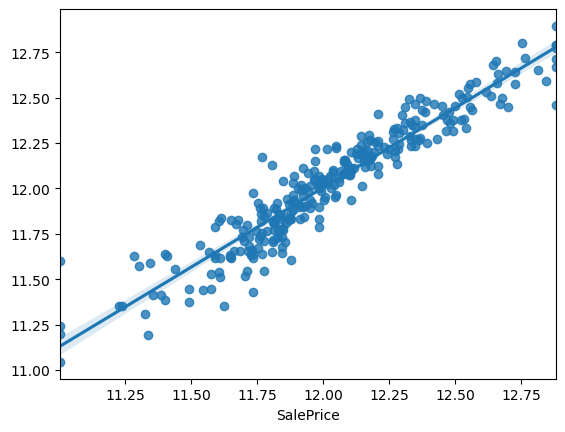

In [63]:
lr = LinearRegression()
BuiltModel(lr)

## DecisionTreeRegressor Model

MAE : 0.1370820023041
RMSE : 0.1911089967328372
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 73.5254661212362 %
------------------------------

Cross validation score : 70.89552260285576

Accuracy Score - Cross Validation Score : 2.6299435183804434


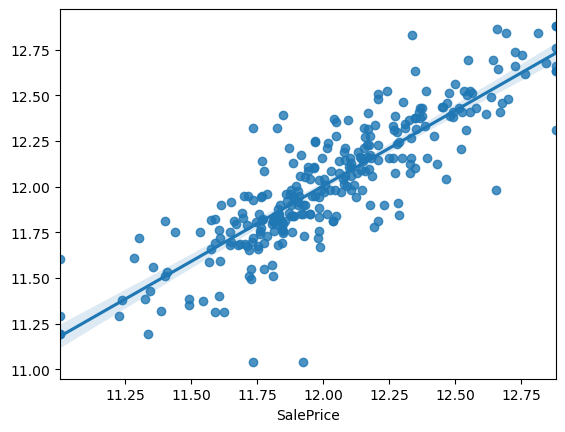

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

## RandomForestRegressor Model

MAE : 0.08918946562553669
RMSE : 0.12622697705989266
------------------------------
Training r2 Score : 98.11059239916953 %
Testing r2 Score: 88.45030752762236 %
------------------------------

Cross validation score : 88.26007399749504

Accuracy Score - Cross Validation Score : 0.19023353012731548


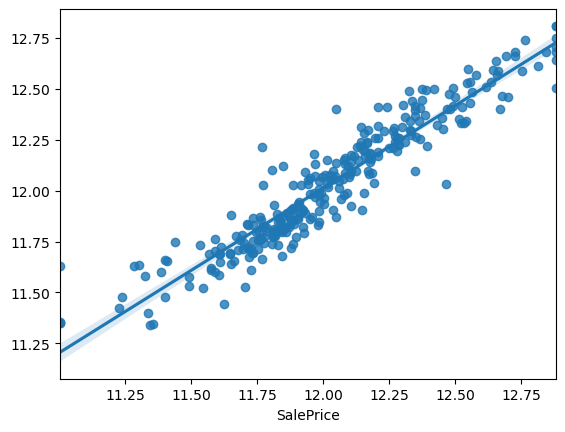

In [65]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
BuiltModel(rf)

## XGBRegressor model

MAE : 0.0890879365481817
RMSE : 0.11932061076841524
------------------------------
Training r2 Score : 99.99212624778993 %
Testing r2 Score: 89.67958900466691 %
------------------------------

Cross validation score : 88.03582887635302

Accuracy Score - Cross Validation Score : 1.643760128313886


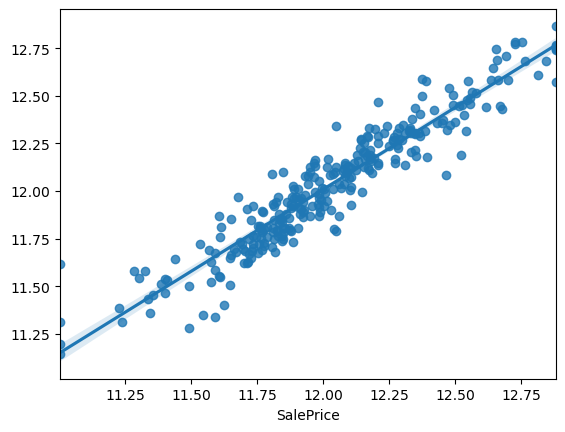

In [66]:
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
BuiltModel(xgb)

## ExtraTreesRegressor model

MAE : 0.08751695022616653
RMSE : 0.12126149786084428
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 89.34111162035958 %
------------------------------

Cross validation score : 87.37382420803745

Accuracy Score - Cross Validation Score : 1.9672874123221362


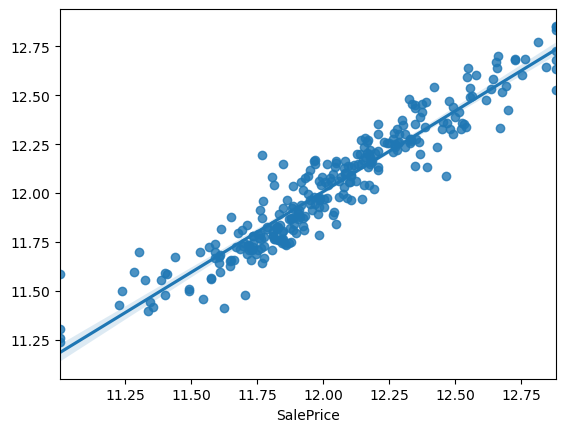

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
BuiltModel(ext)

## LGBMRegressor model

MAE : 0.08159192530011566
RMSE : 0.11117570394727563
------------------------------
Training r2 Score : 99.19963481706179 %
Testing r2 Score: 91.04045751125274 %
------------------------------

Cross validation score : 88.42781168398886

Accuracy Score - Cross Validation Score : 2.6126458272638757


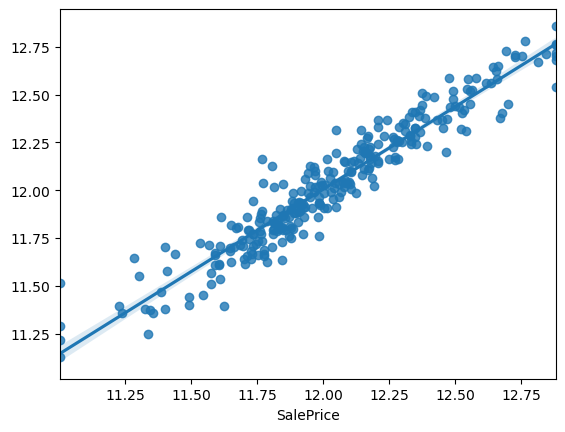

In [68]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
BuiltModel(lgbm)

As we can see RandomForestRegressor is giving least difference in accuracy and CV-score among all these algorithms, so I am selecting this for our final model as best suitable algorithm

## HyperParameter Tuning

In [69]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12],
                'n_estimators':[500,700,900,1000],
                'min_samples_split': [2]
                }

In [70]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 9, 10, 12], 'min_samples_split': [2],
                         'n_estimators': [500, 700, 900, 1000]})

In [71]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 700}

## Final Model

In [72]:
#lets train and test our final model with best parameters
model = RandomForestRegressor(max_depth = 12, min_samples_split = 2, n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.08928963338399588
RMSE : 0.12397319814585754
------------------------------
 
r2 Score: 88.85906431597634 %


#### Great we have got improved our accuracy from 88.60% to 88.99% after Hyperparameter tuning

- __Lets see final Actual Vs Predicted sample__

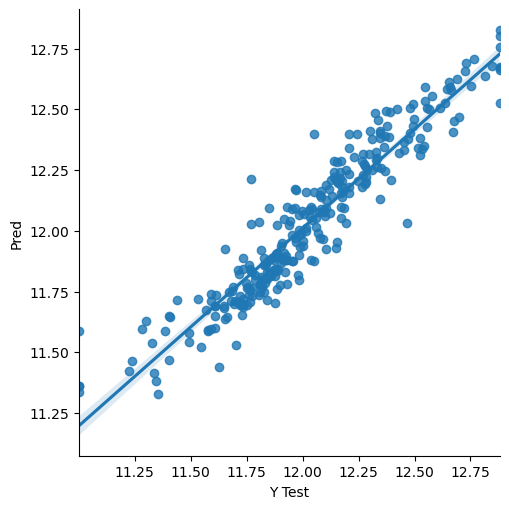

In [73]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

## Model Saving

In [74]:
import joblib
joblib.dump(model,"Housing Project.pkl")

['Housing Project.pkl']

In [75]:
model = joblib.load('Housing Project.pkl')

## Making predictions for test dataset using final model

In [76]:
df_test.reset_index(inplace=True)

In [77]:
df_test.drop(columns = 'index', inplace = True)

In [78]:
#Lets treat the skewness
for index in df_test.skew().index:
    if df_test.skew().loc[index]>0.5:
        df_test[index]=np.log1p(df_test[index])
        if df_test.skew().loc[index]<-0.5:
            df_test[index]=np.square(df_test[index])

In [79]:
num_data = df_test.select_dtypes(include = [np.number])
cat_data = df_test.select_dtypes(exclude=[np.number])

In [80]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [81]:
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [82]:
Test = pd.concat([num, cat_data], axis = 1)

In [83]:
Test.drop(columns = 'SalePrice',inplace = True)

In [84]:
#lets predict the price with our best model
prediction = model.predict(Test)

In [85]:
prediction

array([12.69489818, 12.30389202, 12.43214723, 12.05377067, 12.1506017 ,
       11.34840855, 11.83585168, 12.56454286, 12.42035612, 12.03755718,
       11.32846232, 11.92298461, 11.76517383, 12.10275177, 12.53891298,
       11.80605399, 11.64131618, 11.74110022, 12.03354005, 12.2379738 ,
       12.03222711, 11.9110167 , 11.94671201, 11.2867424 , 11.54057701,
       11.74660991, 12.09389002, 11.90090836, 12.00731076, 11.55147643,
       11.88732066, 12.16461225, 12.3712232 , 11.98717892, 11.57555448,
       12.06146241, 12.149604  , 11.70318608, 12.02610029, 11.93289882,
       11.59567779, 12.62213218, 12.22244848, 12.179534  , 11.76645737,
       11.82626552, 11.75598161, 11.52150853, 12.25505877, 12.6006527 ,
       11.94810172, 12.10350552, 11.59396316, 11.52896233, 12.53699986,
       11.69190406, 11.90644632, 12.17176491, 11.67759019, 12.35966395,
       11.49770834, 12.04822037, 11.79817667, 11.869983  , 12.21331988,
       11.47835291, 11.90838968, 12.23147272, 11.84539334, 11.95

In [86]:
#lets make the dataframe for prediction
house_price = pd.DataFrame(prediction, columns=["Price"])

In [87]:
Test = pd.read_csv("test.csv")

Now I will create new column as SalePrice and add it to test dataset

In [88]:
Test['SalePrice'] = np.exp(house_price)

In [89]:
Test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0           HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
3           Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
4           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
..          ...       ...  ...      ...    ...   ...         ...     ...   
287         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
288         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
289         Lvl    AllPub  ...        0    NaN   NaN        Shed     700   
290         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
291         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition      SalePrice  
0        7   2007        WD         Normal  326080.050486  
1        8   2009       COD        Abnorml  220552.715620  
2        6   2009        WD         Normal  250733.832146  
3        7   2009        WD         Normal  171745.785844  
4        1   2008        WD         Normal  189207.901750  
..     ...    ...       ...            ...            ...  
287     10   2008        WD         Normal  240562.870076  
288      2   2008        WD         Normal  136623.534697  
289      3   2010        WD         Normal  144571.893751  
290     10   2006        WD         Normal  163607.547919  
291      6   2006        WD         Normal   95425.887307  

[292 rows x 81 columns]

In [91]:
#Lets save the submission to csv
Test.to_csv("Housing Project.csv",index=False)

# ---------------------          thank you